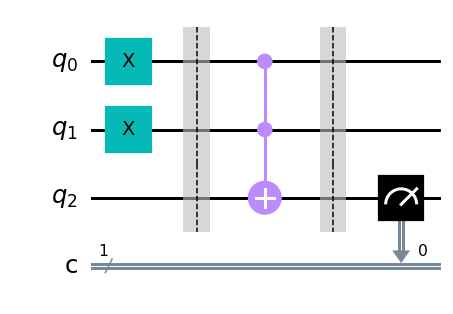

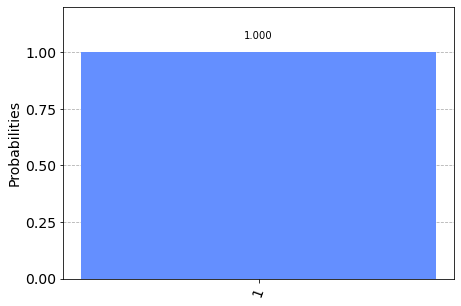

In [1]:
# boolean_gates.ipynb

# Cell 1 - Boolean AND Gate

import matplotlib.pyplot as plt
import numpy as np
import qiskit
from IPython.display import Math
from qiskit import Aer, QuantumCircuit, assemble, execute
from qiskit.quantum_info import Statevector
from qiskit.visualization import (
    array_to_latex,
    plot_bloch_multivector,
    plot_histogram,
    plot_state_qsphere,
)

backend = Aer.get_backend("aer_simulator")
# Requires 3 bits, 0 and 1 are set to the |1> state
# 2 is an "inselabit" that allows us to then leverage the CCNOT gate
# in a reversible manner 
qc = QuantumCircuit(3, 1)

qc.x(0)
qc.x(1)
qc.barrier()

qc.ccx(0, 1, 2)
# qc.barrier() ensures that all gates are fully applied and the
# system has had time to re-stabilize
qc.barrier()

qc.measure(2, 0)

result = execute(qc, backend, shots=1).result()
counts = result.get_counts()

display(qc.draw(output="mpl", scale=1.5))
plot_histogram(counts)

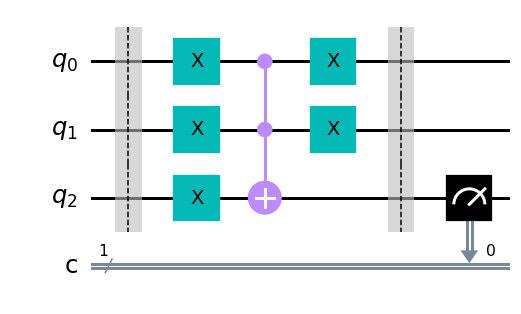

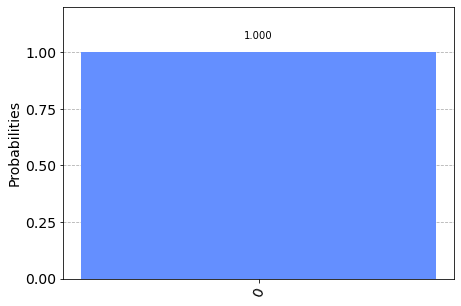

In [5]:
# Cell 2 - Boolean OR Gate

backend = Aer.get_backend("aer_simulator")
qc = QuantumCircuit(3, 1)

#qc.x(0)
#qc.x(1)

qc.barrier()

qc.x(0)
qc.x(1)
qc.x(2)

qc.ccx(0, 1, 2)

qc.x(0)
qc.x(1)

qc.barrier()

qc.measure(2, 0)

result = execute(qc, backend, shots=1).result()
counts = result.get_counts()

display(qc.draw(output="mpl", scale=1.5))
plot_histogram(counts)

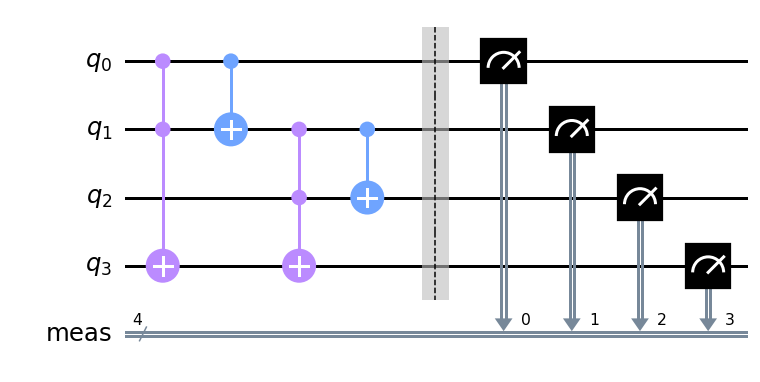

In [6]:
# Cell 3 - Feynman's Full Adder (1985)

backend = Aer.get_backend("aer_simulator")
qc = QuantumCircuit(4)

qc.ccx(0, 1, 3)
qc.cx(0, 1)
qc.ccx(1, 2, 3)
qc.cx(1, 2)
qc.measure_all()

display(qc.draw(output="mpl", scale=1.5))

In [7]:
# Cell 4 - Generate truth table for Feynman's Full Adder


def full_carry(a, b, c_in):
    backend = Aer.get_backend("aer_simulator")
    qc = QuantumCircuit(4)

    # Initialize input bit to one if necessary
    if a == 1:
        qc.x(0)
    if b == 1:
        qc.x(1)
    if c_in == 1:
        qc.x(2)

    qc.ccx(0, 1, 3)
    qc.cx(0, 1)
    qc.ccx(1, 2, 3)
    qc.cx(1, 2)
    qc.measure_all()

    qc.save_statevector()
    result = execute(qc, backend, shots=1).result()
    final_state = result.get_statevector()
    counts = result.get_counts()
    return counts


print("|c_in| b | a |  |c_out| s |")
print("|----|---|---|  |-----|---|")

for c_in in [0, 1]:
    for b in [0, 1]:
        for a in [0, 1]:
            c_out, s = list(full_carry(a, b, c_in))[0][:2]
            print(f"|  {c_in} | {b} | {a} |  |  {c_out}  | {s} |")

|c_in| b | a |  |c_out| s |
|----|---|---|  |-----|---|
|  0 | 0 | 0 |  |  0  | 0 |
|  0 | 0 | 1 |  |  0  | 1 |
|  0 | 1 | 0 |  |  0  | 1 |
|  0 | 1 | 1 |  |  1  | 0 |
|  1 | 0 | 0 |  |  0  | 1 |
|  1 | 0 | 1 |  |  1  | 0 |
|  1 | 1 | 0 |  |  1  | 0 |
|  1 | 1 | 1 |  |  1  | 1 |
